## SE370 - Computer Aided Systems Final Project Tech Report
CDTs Sang and Sundy


LTC Bastian - F1

# **Problem Definition**

We wish to execute a project that analyzes the housing market around Fort Bragg. The
intent is to create an application or package for prospective home buyers (our decision
makers) to gain a greater understanding of housing options. Ideally, the decision maker
would be provided with graphs comparing a variety of house parameters to price. This
information would allow a buyer to select the most promising properties within an area. 

# **Data Description**

### Redfin Data

Our housing data contains over 300 entries of housing data from the Fort Bragg area from the real estate website redfin.com. The information included in each listing is the property type,  address, city, state, zipcode, beds, price, baths, location, square feet, lot size, year built, days on market, price per square foot, home owners association fees, status, information concerning open house times, the website url, the realtor information, a specific ID number and geographical latitude and longitude information. Much of this information was not needed and was thus filtered out. You can see how below

### Web Scraped Data

The school dataset comes from this source: https://www.schooldigger.com/go/NC/city/Fayetteville/search.aspx

The dataset contains over 70 entries of public and private schools in the Fayetville, North Carolina area. This dataset includes the school name, type, grades enrolled, the address, city, zipcode, the county it is in, and the school district. 


## Filtering the Dataset

In [6]:
import pandas as pd 
import geopandas
import geopy
import matplotlib.pyplot as plt


data=pd.read_csv('redfin_data.csv')

data=data.dropna(subset = ['LATITUDE', 'LONGITUDE','PRICE','BEDS','BATHS','SQUARE FEET','ZIP OR POSTAL CODE'])

data=data[data['SALE TYPE']=='MLS Listing']
data=data[data['SQUARE FEET']<=15000]

gdf=geopandas.GeoDataFrame(
    data, geometry=geopandas.points_from_xy(data.LONGITUDE, data.LATITUDE))

gdf.head()

gdf.crs="EPSG:4269"


In [7]:
import requests
import folium
import polyline
import geopandas
import pandas as pd
import geopy
import matplotlib.pyplot as plt

ft_bragg = geopandas.tools.geocode('Fort Bragg, NC')
distance=50

ft_bragg_buffer=geopandas.GeoDataFrame(geometry=ft_bragg.geometry.buffer(distance=(distance*1609.34)/100000))

gdf_within=gdf.loc[gdf.geometry.within(ft_bragg_buffer.unary_union)]

print(gdf.shape)
print(gdf_within.shape)


(255, 28)
(255, 28)


C:\Users\Robert.Sundy\AppData\Local\Temp\ipykernel_6448\4193764076.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ft_bragg_buffer=geopandas.GeoDataFrame(geometry=ft_bragg.geometry.buffer(distance=(distance*1609.34)/100000))


### Web Scraping

In [ ]:
import requests
import csv
from bs4 import BeautifulSoup

url = 'https://www.schooldigger.com/go/NC/city/Fayetteville/search.aspx'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')

table = soup.find('table', {'id': 'tabSchooList'})
if not table:
    print('Error: Could not find table on page')
    exit()

rows = table.find_all('tr')

# Open CSV file for writing
with open('schools.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)

    # Write headers
    headers = ['Name', 'Type', 'Grade', 'Address', 'City', 'Zipcode', 'County', 'School District']
    writer.writerow(headers)

    # Write data rows
    for row in rows[1:]:  # Skip first row as it contains headers
        cells = row.find_all('td')
        if cells:
            school_name = cells[0].find('a').text.strip()
            school_type = cells[1].text.strip()
            grade = cells[2].text.strip()
            address = cells[3].text.strip()
            city = cells[4].text.strip()
            zipcode = cells[5].text.strip()
            county = cells[6].text.strip()
            school_district = cells[7].text.strip()
            writer.writerow([school_name, school_type, f'"{grade}"', address, city, zipcode, county, school_district])

print('Data written to schools.csv')



### Visual Representation of Data

### *Graph Title*

In [8]:
import plotly.express as px

fig = px.box(gdf_within, x='ZIP CAT', y='$/SQUARE FEET', title='Price by Zip Code',
             labels= {'Pclass': "Passenger Class"}, height = 500, template='plotly_dark', color='ZIP CAT')
fig.show()


ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS', 'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE', 'geometry'] but received: ZIP CAT

### *Graph Title*

In [9]:
fig=px.scatter(gdf_within, x='SQUARE FEET', y='PRICE', color='ZIP CAT', symbol='ZIP CAT', title='Price by Square Feet' , 
               height=500, template='plotly_dark', hover_data={'ZIP CAT':False,'BEDS':True,'BATHS':True,},trendline='ols')

fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=14,
        font_family="Arial"
    )
)

fig.show()

# https://plotly.com/python/line-and-scatter/#scatter-plots-with-plotly-express
# https://plotly.com/python/hover-text-and-formatting/

ValueError: Value of 'hover_data_0' is not the name of a column in 'data_frame'. Expected one of ['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS', 'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE', 'geometry'] but received: ZIP CAT

### *Graph Title*

In [10]:
fig=px.scatter(gdf_within, x='SQUARE FEET', y='$/SQUARE FEET', color='ZIP CAT', symbol='ZIP CAT', title='Price Per Square Foot by Square Foot' , 
               height=500, template='plotly_dark', hover_data=['BEDS','BATHS'],trendline='ols')
fig.show()

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS', 'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE', 'geometry'] but received: ZIP CAT

# **Methodology**

a description of how you structured your analysis.  Describe the whole process from data acquisition to recommendation without getting into your specific analysis.  For example, “we conducted a regression analysis” is sufficient while “our regression analysis showed that…” is not necessary in this section.


# **Analysis and Results**

### Geospatial Analysis

insert information to support analysis

In [11]:
m = folium.Map(location=[35.07854,-78.95871], tiles = 'cartodb positron', zoom_start=12)

for lat,lon,beds,baths,price,sqft,year,dol_per_feet,house_type,zipcode,url in zip(gdf_within.LATITUDE,gdf_within.LONGITUDE,
                                                                     gdf_within.BEDS,gdf_within.BATHS,
                                                                     gdf_within.PRICE,gdf_within['SQUARE FEET'],
                                                                     gdf_within['YEAR BUILT'],gdf_within['$/SQUARE FEET'],
                                                                     gdf_within['PROPERTY TYPE'],gdf_within['ZIP OR POSTAL CODE'],
                                                                     gdf_within['URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)']):
    
    
    html1='''
    <! DOCTYPE html>
    <html>
    <p>Property Type: '''+str(house_type)+'''<br>
    Price: '''+str(price)+'''<br>
    Square Feet: '''+str(sqft)+'''<br>
    $/ft: '''+str(dol_per_feet)+'''<br>
    Beds: '''+str(beds)+'''<br>
    Baths: '''+str(baths)+'''<br>
    Year: '''+str(year)+'''<br>
    Zipcode: '''+str(zipcode)+'''</p>
    <a href= ''' +url+'''>URL</a>
    </html>
    '''
    popup=folium.Popup(html1,max_width=500)
    
    
    html2='''
    <! DOCTYPE html>
    <html>
    <p>Property Type: '''+str(house_type)+'''<br>
    Price: '''+str(price)+'''<br>
    Square Feet: '''+str(sqft)+'''<br>
    Beds: '''+str(beds)+'''<br>
    Baths: '''+str(baths)+'''</p>
    </html>
    '''
    tooltip=folium.Tooltip(html2)
    
    
    
    folium.Marker(location=[lat, lon],
                  icon=folium.Icon(icon='home', color='blue'),
                  popup=popup,
                  tooltip=tooltip
    ).add_to(m)
    
folium.Marker(location=[35.07854,-78.95871],
             icon=folium.Icon(icon='briefcase', color='red')
             ).add_to(m)

m

# https://towardsdatascience.com/use-html-in-folium-maps-a-comprehensive-guide-for-data-scientists-3af10baf9190
# https://stackoverflow.com/questions/62228489/python-folium-how-to-create-a-folium-map-marker-with-multiple-popup-text-line

## Statistical Analysis

insert information to support analysis

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

x=gdf_within['SQUARE FEET']
X=np.column_stack((x,gdf_within['BEDS']))
Y=gdf_within['PRICE']

model=sm.OLS(Y,X)
results=model.fit()
print(results.summary())

pred_ols = model.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, Y, "o", label="Data")
ax.plot(x, y_true, "b-", label="True")
ax.plot(x, model.fittedvalues, "r--.", label="Predicted")
ax.plot(x, iv_u, "r--")
ax.plot(x, iv_l, "r--")
legend = ax.legend(loc="best")

# https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

                                 OLS Regression Results                                
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                              2161.
Date:                Tue, 09 May 2023   Prob (F-statistic):                   8.99e-160
Time:                        13:08:21   Log-Likelihood:                         -3257.1
No. Observations:                 255   AIC:                                      6518.
Df Residuals:                     253   BIC:                                      6525.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

AttributeError: 'OLS' object has no attribute 'get_prediction'

In [14]:
unique_zips=set(gdf_within['ZIP OR POSTAL CODE'])
print(unique_zips)
for zipcode in unique_zips:
    locals() ['zipcode_'+str(zipcode)]=gdf_within[gdf_within['ZIP OR POSTAL CODE']==zipcode] 

R=[[zipcode_28326['PRICE']],[zipcode_28301['PRICE']],
   [zipcode_28303['PRICE']],[zipcode_28304['PRICE']],
   [zipcode_28305['PRICE']],[zipcode_28306['PRICE']],
   [zipcode_28311['PRICE']],[zipcode_28312['PRICE']],
   [zipcode_28314['PRICE']],[zipcode_28348['PRICE']]]



#https://stackoverflow.com/questions/47848269/python-create-variable-according-to-for-loop-index

{28326, 28301, 28303, 28304, 28305, 28306, 28311, 28312, 28314, 28348}


In [106]:
zip_28301=gdf_within[gdf_within['ZIP OR POSTAL CODE']==28301]
gdf_within['ZIP CAT']=gdf_within['ZIP OR POSTAL CODE'].astype(str)


#https://stackoverflow.com/questions/22005911/convert-columns-to-string-in-pandas

# **Graphs**

## Price by Zipcode

In [15]:
import plotly.express as px

fig = px.box(gdf_within, x='ZIP CAT', y='$/SQUARE FEET', title='Price by Zip Code',
             labels= {'Pclass': "Passenger Class"}, height = 500, template='plotly_dark', color='ZIP CAT')
fig.show()


ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS', 'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE', 'geometry'] but received: ZIP CAT

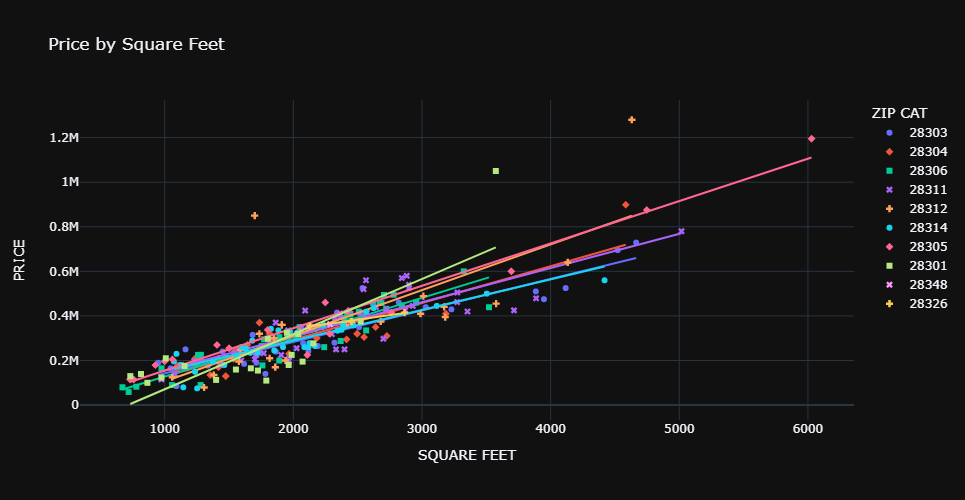

In [124]:
fig=px.scatter(gdf_within, x='SQUARE FEET', y='PRICE', color='ZIP CAT', symbol='ZIP CAT', title='Price by Square Feet' , 
               height=500, template='plotly_dark', hover_data={'ZIP CAT':False,'BEDS':True,'BATHS':True,},trendline='ols')

fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=14,
        font_family="Arial"
    )
)

fig.show()

# https://plotly.com/python/line-and-scatter/#scatter-plots-with-plotly-express
# https://plotly.com/python/hover-text-and-formatting/

In [1]:
fig=px.scatter(gdf_within, x='SQUARE FEET', y='$/SQUARE FEET', color='ZIP CAT', symbol='ZIP CAT', title='Price Per Square Foot by Square Foot' , 
               height=500, template='plotly_dark', hover_data=['BEDS','BATHS'],trendline='ols')
fig.show()

NameError: name 'px' is not defined